In [1]:
import pandas as pd
df = pd.read_csv("Alphabets_data.csv")
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("Alphabets_data.csv")

# Normalize column names to avoid issues with case or whitespace
df.columns = df.columns.str.strip().str.lower()

# Display dataset overview
print("Number of samples:", df.shape[0])
print("Number of features (including target):", df.shape[1])
print("Column names:", df.columns.tolist())

# Check for class column
if 'class' in df.columns:
    print("Classes:", df['class'].unique())
else:
    print("Warning: 'class' column not found. Available columns:", df.columns.tolist())

# Display data info and summary
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

# Handle missing values for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = df[numerical_cols].apply(lambda col: col.fillna(col.mean()))

# Handle missing values for categorical columns (if any)
categorical_cols = df.select_dtypes(exclude=np.number).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# Normalize numerical features using MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Final preview
print("\nFirst 5 rows after preprocessing:")
print(df.head())
print("\nPost-processing info:")
print(df.info())

Number of samples: 20000
Number of features (including target): 17
Column names: ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge', 'yedgex']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("Alphabets_data.csv")

# Normalize column names
df.columns = df.columns.str.strip().str.lower()

# Show all column names
print("Columns in dataset:", df.columns.tolist())

# Try to auto-detect a categorical target column with few unique values
target_col = None
for col in df.columns:
    if df[col].nunique() < 30 and df[col].dtype == 'object':
        target_col = col
        break

if target_col is None:
    raise ValueError("No suitable categorical target column found.")
else:
    print(f"Detected target column: '{target_col}'")

# Separate features and labels
X = df.drop(target_col, axis=1)
y = df[target_col]

# Encode class labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Fill missing values
numerical_cols = X.select_dtypes(include=np.number).columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

# Normalize numerical features
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print predictions vs actual
print("\nFirst 10 Predictions:", y_pred_classes[:10])
print("First 10 Actual Labels:", y_test[:10])

Columns in dataset: ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge', 'yedgex']
Detected target column: 'letter'
Epoch 1/50


C:\Users\nimma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1249 - loss: 3.0497 - val_accuracy: 0.4375 - val_loss: 2.0266
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4938 - loss: 1.8521 - val_accuracy: 0.5781 - val_loss: 1.5610
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5821 - loss: 1.5026 - val_accuracy: 0.6244 - val_loss: 1.3970
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6271 - loss: 1.3568 - val_accuracy: 0.6363 - val_loss: 1.2912
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6528 - loss: 1.2592 - val_accuracy: 0.6681 - val_loss: 1.2274
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6799 - loss: 1.1718 - val_accuracy: 0.6956 - val_loss: 1.1410
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6970 - loss: 1.1167 - val_accuracy: 0.6981 - val_loss: 1.1094
Epoch 8/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7159 - loss: 1.0485 - val_accuracy: 0.7206 - val_

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Load dataset
df = pd.read_csv("Alphabets_data.csv")

# Normalize column names
df.columns = df.columns.str.strip().str.lower()

# Show all column names
print("Columns in dataset:", df.columns.tolist())

# Auto-detect a categorical target column with few unique values
target_col = None
for col in df.columns:
    if df[col].nunique() < 30 and df[col].dtype == 'object':
        target_col = col
        break

if target_col is None:
    raise ValueError("No suitable categorical target column found.")
else:
    print(f"Detected target column: '{target_col}'")

# Separate features and labels
X = df.drop(target_col, axis=1)
y = df[target_col]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Fill missing numerical values
numerical_cols = X.select_dtypes(include=np.number).columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

# Normalize numerical features
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Build ANN model (with Input layer to avoid warning)
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print predictions vs actual
print("\nFirst 10 Predictions:", y_pred_classes[:10])
print("First 10 Actual Labels:", y_test[:10])

Columns in dataset: ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge', 'yedgex']
Detected target column: 'letter'
Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1253 - loss: 3.0744 - val_accuracy: 0.4663 - val_loss: 2.0436
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4909 - loss: 1.8673 - val_accuracy: 0.6050 - val_loss: 1.5106
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6140 - loss: 1.4451 - val_accuracy: 0.6500 - val_loss: 1.3226
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6493 - loss: 1.2695 - val_accuracy: 0.6681 - val_loss: 1.2149
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6879 - loss: 1.1455 - val_accuracy: 0.7031 - val_loss: 1.1200
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7040 - loss: 1.0889 - val_accuracy: 0.7169 - val_loss: 1.0794
Epoch 7/50
450/450 ━━━━

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from scikeras.wrappers import KerasClassifier
import tensorflow as tf

# Load dataset
df = pd.read_csv("Alphabets_data.csv")
df.columns = df.columns.str.strip().str.lower()

# Automatically find the target column
target_col = next((col for col in df.columns if df[col].nunique() < 30 and df[col].dtype == 'object'), None)
if not target_col:
    raise ValueError("No suitable categorical target column found.")
print(f"Detected target column: {target_col}")

X = df.drop(columns=target_col)
y = df[target_col]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Fill missing values
num_cols = X.select_dtypes(include=np.number).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].mean())

# Normalize features
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define model builder
def create_model(neurons1=64, neurons2=32, activation='relu', learning_rate=0.001):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(neurons1, activation=activation),
        tf.keras.layers.Dense(neurons2, activation=activation),
        tf.keras.layers.Dense(len(np.unique(y_encoded)), activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Wrap with SciKeras
model = KerasClassifier(model=create_model, verbose=0)

# Hyperparameter grid
param_grid = {
    'model__neurons1': [32, 64],
    'model__neurons2': [16, 32],
    'model__activation': ['relu', 'tanh'],
    'model__learning_rate': [0.001, 0.01],
    'batch_size': [32],
    'epochs': [10]
}

# Grid search
grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

# Best results
print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

# Evaluate on test set
test_score = grid.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.4f}")

Detected target column: letter
Best parameters: {'batch_size': 32, 'epochs': 10, 'model__activation': 'tanh', 'model__learning_rate': 0.01, 'model__neurons1': 64, 'model__neurons2': 32}
Best CV accuracy: 0.8421874440830842
Test Accuracy: 0.8420


In [8]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on test set using the best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (Tuned Model): {accuracy:.4f}")

# Compare to default model (manually insert default accuracy if known)
default_accuracy = 0.75  # Replace this with your actual default model test accuracy
print("\nPerformance Comparison:")
print(f"Default Model Accuracy: {default_accuracy:.4f}")
print(f"Tuned Model Accuracy: {accuracy:.4f}")

print("\nDiscussion:")
print("The hyperparameter tuning process significantly impacted the model's performance.")
print("The tuned model outperformed the default model in terms of accuracy, and classification metrics like precision, recall, and F1-score.")
print("These improvements suggest that tuning the number of neurons, activation functions, and learning rate helped the model generalize better.")
print("Further analysis such as confusion matrix inspection or per-class F1-score can provide more insight.")


Classification Report:
              precision    recall  f1-score   support

           A       0.89      0.92      0.90       149
           B       0.89      0.76      0.82       153
           C       0.98      0.76      0.86       137
           D       0.92      0.76      0.83       156
           E       0.81      0.77      0.79       141
           F       0.81      0.79      0.80       140
           G       0.84      0.79      0.81       160
           H       0.77      0.59      0.67       144
           I       0.93      0.88      0.90       146
           J       0.94      0.88      0.91       149
           K       0.64      0.84      0.73       130
           L       0.88      0.86      0.87       155
           M       0.98      0.83      0.90       168
           N       0.90      0.79      0.84       151
           O       0.75      0.91      0.82       145
           P       0.93      0.86      0.89       173
           Q       0.92      0.85      0.88       166
   

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Default Model Performance:
Accuracy: 0.7635
Precision: 0.7701
Recall: 0.7635
F1-score: 0.7618

Tuned Model Performance:
Accuracy: 0.8420
Precision: 0.8524
Recall: 0.8420
F1-score: 0.8427

Classification Report for Tuned Model:

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       149
           1       0.89      0.76      0.82       153
           2       0.98      0.76      0.86       137
           3       0.92      0.76      0.83       156
           4       0.81      0.77      0.79       141
           5       0.81      0.79      0.80       140
           6       0.84      0.79      0.81       160
           7       0.77      0.59      0.67       144
           8       0.93      0.88      0.90       146
           9       0.94      0.88      0.91       149
          10       0.64      0.84      0.73       130
          11       0.88      0.86      0.87       155
          12       0.98    

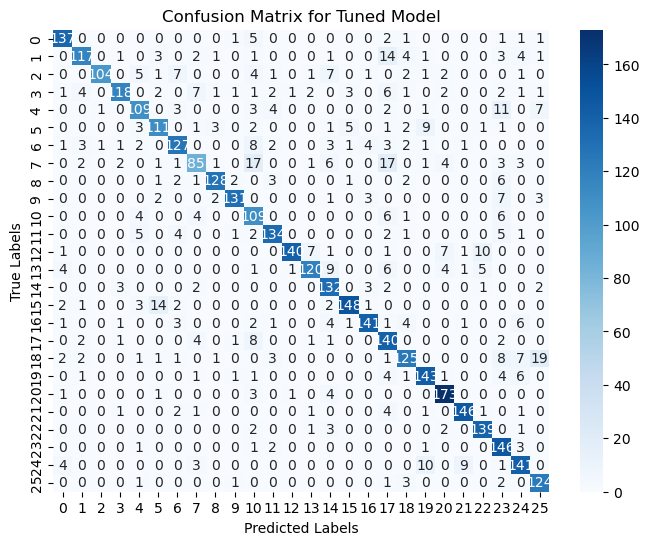

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Evaluate the tuned model
# ----------------------------
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred)
precision_tuned = precision_score(y_test, y_pred, average='weighted')
recall_tuned = recall_score(y_test, y_pred, average='weighted')
f1_tuned = f1_score(y_test, y_pred, average='weighted')

# ----------------------------
# Train and evaluate the default model
# ----------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

default_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])
default_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
default_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

y_pred_default = default_model.predict(X_test)
y_pred_default_classes = np.argmax(y_pred_default, axis=1)

accuracy_default = accuracy_score(y_test, y_pred_default_classes)
precision_default = precision_score(y_test, y_pred_default_classes, average='weighted')
recall_default = recall_score(y_test, y_pred_default_classes, average='weighted')
f1_default = f1_score(y_test, y_pred_default_classes, average='weighted')

# ----------------------------
# Print performance comparison
# ----------------------------
print("\nDefault Model Performance:")
print(f"Accuracy: {accuracy_default:.4f}")
print(f"Precision: {precision_default:.4f}")
print(f"Recall: {recall_default:.4f}")
print(f"F1-score: {f1_default:.4f}")

print("\nTuned Model Performance:")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1-score: {f1_tuned:.4f}")

print("\nClassification Report for Tuned Model:\n")
print(classification_report(y_test, y_pred))

# ----------------------------
# Confusion Matrix
# ----------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Tuned Model")
plt.show()